In [2]:
from TestSetOverfitting import *
import pandas as pd
import warnings
import seaborn

import matplotlib.pyplot as plt
import numpy as np


warnings.filterwarnings("ignore")

# Max Sharpe Ratio Experiment
Validates the False Strategy Theorem experimentally

In [3]:
nTrials = list(set(np.logspace(1, 6, 40).astype(int)));nTrials.sort()
sr0 = pd.Series({i:expected_max_sharpe_ratio(i, mean_sharpe_ratio=0, std_sharpe_ratio=1) for i in nTrials})
sr1 = generated_max_sharpe_ratio(nSims=100, nTrials=nTrials, mean_sharpe_ratio=0, std_sharpe_ratio=1)

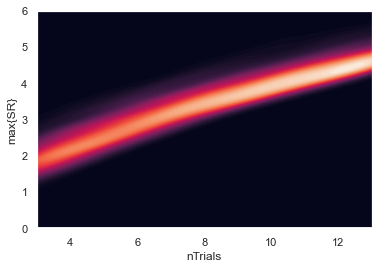

In [15]:
seaborn.set(style='dark')
plt.xlim(3, 13)
plt.ylim(0, 6)

res=seaborn.kdeplot(x = np.log(sr1['nTrials']), 
    y = sr1['max{SR}'], fill=True, thresh=0, 
    levels=100, cmap="rocket", )

plt.show()

In [ ]:
fig = go.Figure()
trace2 = go.Scatter(
    x=sr1.nTrials,
    y=sr1['max{SR}'],
    mode='markers',
    name='Expected Max SR'
)
fig.add_trace(trace2)
trace = go.Scatter(
    x=sr0.index,
    y=sr0,
    mode='markers',
    marker_size=10,
    name='Experiment'
)
fig.add_trace(trace)
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
}, xaxis_title="Number of Trials")
fig.show()

# Mean and standard deviation of the predicted errors
Calculates mean and standard deviation of the predicted errors

In [ ]:
nTrials = list(set(np.logspace(1, 4, 40).astype(int)));nTrials.sort()
stats = mean_std_error(nSims0=1000, nSims1=100, nTrials=nTrials, std_sharpe_ratio=1)

In [ ]:
stats

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
trace2 = go.Scatter(
    x=stats.index,
    y=stats.meanErr,
    mode='markers',
    name='Mean Error',
    marker_size=10
)
fig.add_trace(trace2)
trace = go.Scatter(
    x=stats.index,
    y=stats.stdErr,
    mode='markers',
    name='Std',
    marker_size=10
)
fig.add_trace(trace, secondary_y=True)
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

# Type I error probability
Calculates type I error probability of stratgies

In [ ]:
t, skew, kurt, k, freq=1250, -3, 10, 10, 250
sr = 1.25 / freq ** 0.5
sr_ = 1 / freq ** 0.5
z = estimated_sharpe_ratio_z_statistics(sr, t, 0, skew, kurt)
α_k = strategy_type1_error_probability(z, k)
print(α_k)

# Type II error probability
Calculates type II error probability of stratgies

In [ ]:
t, skew, kurt, k, freq = 1250, -3, 10, 10, 250
sr = 1.25 / freq ** 0.5
sr_ = 1 / freq ** 0.5
z = estimated_sharpe_ratio_z_statistics(sr, t, 0, skew, kurt)
α_k = strategy_type1_error_probability(z, k)
θ = theta_for_type2_error(sr, t, sr_, skew, kurt)
β = strategy_type2_error_probability(α_k, k, θ)
β_k = β**k
print(β_k)

In [ ]:
def calculate_beta(α, k):
    t, skew, kurt, freq = 1250, -3, 10, 250
    sr = 1.25 / freq ** 0.5
    sr_ = 1 / freq ** 0.5
    θ = theta_for_type2_error(sr, t, sr_, skew, kurt)
    β = strategy_type2_error_probability(α, k, θ)
    β_k = β**k

    return β_k


β1 = [calculate_beta(0.01, i) for i in np.linspace(1, 25, 50)]
β2 = [calculate_beta(0.025, i) for i in np.linspace(1, 25, 50)]
β3 = [calculate_beta(0.005, i) for i in np.linspace(1, 25, 50)]

In [ ]:
fig = go.Figure()
trace = go.Scatter(
    x=np.linspace(1, 25, 50),
    y=β1,
    mode='markers',
    name='β1',
    marker_size=10
)
fig.add_trace(trace)
trace = go.Scatter(
    x=np.linspace(1, 25, 50),
    y=β2,
    mode='markers',
    name='β2',
    marker_size=10
)
fig.add_trace(trace)
trace = go.Scatter(
    x=np.linspace(1, 25, 50),
    y=β3,
    mode='markers',
    name='β3',
    marker_size=10
)
fig.add_trace(trace)
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
}, xaxis_title="Number of Trials")
fig.show()